In [4]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import framenet as fn
from nltk.corpus.reader.framenet import PrettyList
# nltk.download('framenet_v17')

In [6]:
frames = pd.read_csv('/Users/ez/Desktop/text_memory_and_identity/data collection/eyewitness_abstracts_frame_list.csv', index_col=0)

In [7]:
print(frames.shape)
frames[:2]

(700, 8)


,id,source,text,embedding,sents_token,sents_sample,frames,frames_list
0,03299a0bcddf7cec7bb8587c87af598a30cf6f24,abstracts,Marceline Loridan-Ivens may be best known for ...,"[0.0129690608009696, 0.04015115275979042, -0.0...","[""Marceline Loridan-Ivens may be best known fo...","['She was also a Holocaust survivor, who retur...","['Perception_experience', 'Text_creation', 'Me...","['Perception_experience', 'Text_creation', 'Me..."
1,adb692013a60e1a7eb79ca4759e92fd5245a4f2d,abstracts,"How do extraordinary experiences, especially d...","[-0.01149928942322731, 0.04745658487081528, -0...","['How do extraordinary experiences, especially...",['He then conducts semi-structured interviews ...,"['Discussion', 'Participation', 'Purpose', 'Sc...","['Discussion', 'Participation', 'Purpose', 'Sc..."


#### Find top frames by frequency for each source

**ABSTRACTS**

In [29]:
# ABSTRACTS
abstracts = frames[frames['source'] == 'abstracts']
abstracts = abstracts['frames']

In [30]:
# Transform type
import ast

def transform_str_to_list(cell):
    """
    Identifies a string representation of a list, and turns this into a list literal.
    Inputs:
        (cell): the content of a cell in a df to evaluate.
    Returns: (list)
    """
    str_to_list = ast.literal_eval(cell)
    return str_to_list

In [38]:
# Write function to produce unique frames list and frequences
def count_frames_from_text(col_of_frame_lists):
    # Extract all frames from abstracts texts
    abstracts_frames = []

    for abstract in col_of_frame_lists: # fix so that it's not just "abstract"
        list_of_frames = transform_str_to_list(abstract)
        for frame in list_of_frames:
            abstracts_frames.append(frame)

    # Count the frequency of each frame
    frequency_counter = Counter(abstracts_frames)

    # Sort the dictionary based on frequencies in descending order
    sorted_freq = dict(sorted(frequency_counter.items(), 
                              key=lambda item: item[1], reverse=True))

    # Extract the top N items
    N = 5900  # Number of top items to extract
    top_items = {k: sorted_freq[k] for k in list(sorted_freq)[:N]}

    # Drop "Text" frame
    top_items.pop('Text')

    # Extract unique strings and their frequencies
    uniq_frames_list = list(top_items.keys())
    frequencies = list(top_items.values())

    return uniq_frames_list, frequencies, top_items
    

In [46]:
uniq_frames_list, frequencies, top_items = count_frames_from_text(abstracts)

In [47]:
top_items

{'Scrutiny': 148,
 'Kinship': 147,
 'Perception_experience': 107,
 'Aggregate': 95,
 'People': 86,
 'People_by_age': 76,
 'Surviving': 74,
 'Evidence': 73,
 'Using': 71,
 'Education_teaching': 70,
 'Research': 68,
 'Documents': 66,
 'Discussion': 65,
 'Importance': 61,
 'Awareness': 61,
 'Killing': 60,
 'Hostile_encounter': 59,
 'Intentionally_act': 56,
 'Statement': 56,
 'Objective_influence': 55,
 'Increment': 55,
 'Quantified_mass': 52,
 'Cognitive_connection': 51,
 'Political_locales': 46,
 'Questioning': 46,
 'Means': 45,
 'Age': 44,
 'Similarity': 43,
 'Inclusion': 42,
 'Inspecting': 42,
 'Causation': 42,
 'Existence': 41,
 'Text_creation': 39,
 'Cardinal_numbers': 38,
 'Time_vector': 38,
 'Topic': 37,
 'Participation': 36,
 'Ordinal_numbers': 36,
 'Measure_duration': 34,
 'Purpose': 34,
 'Chatting': 33,
 'Event': 33,
 'Relative_time': 32,
 'Intentionally_create': 31,
 'Reasoning': 30,
 'Grasp': 29,
 'Process': 28,
 'Becoming_aware': 28,
 'Memory': 28,
 'Attempt': 28,
 'Calendric

In [34]:
using_frame = fn.frame_by_name('Perception_experience')
using_frame.definition

"This frame contains perception words whose Perceivers have perceptual experiences that they do not necessarily intend to. For this reason we call the Perceiver role Perceiver_passive. Comparing the Perception_experience frame to the Perception_active frame, we note that for some modalities there are different lexical items in each frame.  For instance, whereas Perception_experience has see, Perception_active has look at. For other sense modalities, we find the same lexical items in both frames.  To illustrate, consider the verb smell where I smell something rotten exemplifies its Perception_experience use and Smell this to see if it's fresh exemplifies its Perception_active sense. This frame also includes words which are not specific to any sense modality, including detect, perceive, perception, sense.  '' 'Abashed, realising that he had overheard her conversation with Victoria, Sheeley didn't try to make excuses.'  'She smelled the wine on Paul's breath, and bade him to sit down.'"

In [10]:
# What does "Using" mean?
# Access the frame "Using" by its name
using_frame = fn.frame_by_name('Using')
using_frame.definition

"An Agent manipulates an Instrument in order to achieve a Purpose.  'For cold conditions, we recommend that you use a heat gun or a hair dryer to make the adhesive work better. '"

In [11]:
using_frame = fn.frame_by_name('Surviving')
using_frame.definition

"A Survivor manages to avoid being negatively affected, despite encountering a Dangerous_situation. The negative effect is most often death, destruction, or a metaphorical construal of one of these.  'Wilderness Survival: Could You Survive the Wild?'  'More than 400 of the 600 residents rode out the hurricane in Gulfport's 11-story high-rise beachfront facility.'"

In [64]:
using_frame = fn.frame_by_name('Cause_harm')
using_frame.definition

"The words in this frame describe situations in which an Agent or a Cause injures a Victim. The Body_part of the Victim which is most directly affected may also be mentioned in the place of the Victim.  In such cases, the Victim is often indicated as a genitive modifier of the Body_part, in which case the Victim FE is indicated on a second FE layer. '' 'Rod saw his father beating his mother.'  'In the end Wormtongue is fed up with being beaten so he cuts Saruman's throat to free himself.'  'A mother stabbed to death by her husband made a secret will stating that he must never be allowed to care for their son.'"

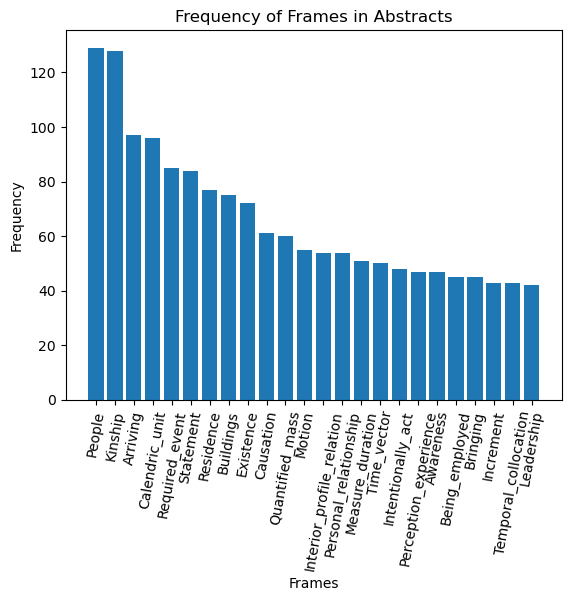

In [48]:
# Plot histogram
plt.bar(uniq_frames_list, frequencies)
plt.xlabel('Frames')
plt.ylabel('Frequency')
plt.title('Frequency of Frames in Abstracts')
plt.xticks(rotation=80)  # Rotate x-axis labels for better readability
plt.show()

**EYEWITNESS**

In [48]:
eyewitness = frames[frames['source'] == 'eyewitness']
eyewitness = eyewitness['frames']

In [49]:
uniq_frames_list, frequencies, top_items = count_frames_from_text(eyewitness)

In [50]:
top_items

{'People': 129,
 'Kinship': 128,
 'Arriving': 97,
 'Calendric_unit': 96,
 'Required_event': 85,
 'Statement': 84,
 'Residence': 77,
 'Buildings': 75,
 'Existence': 72,
 'Causation': 61,
 'Quantified_mass': 60,
 'Motion': 55,
 'Interior_profile_relation': 54,
 'Personal_relationship': 54,
 'Measure_duration': 51,
 'Time_vector': 50,
 'Intentionally_act': 48,
 'Perception_experience': 47,
 'Awareness': 47,
 'Being_employed': 45,
 'Bringing': 45,
 'Increment': 43,
 'Temporal_collocation': 43,
 'Leadership': 42,
 'Political_locales': 41,
 'Capability': 40,
 'Building_subparts': 40,
 'Cardinal_numbers': 38,
 'Aggregate': 38,
 'Request': 37,
 'Possession': 37,
 'Body_parts': 35,
 'Frequency': 34,
 'Age': 34,
 'Desiring': 33,
 'Event': 31,
 'Killing': 30,
 'Food': 29,
 'Cause_harm': 28,
 'Self_motion': 28,
 'Telling': 27,
 'Preventing_or_letting': 27,
 'Becoming_aware': 27,
 'Size': 26,
 'Removing': 26,
 'Vehicle': 26,
 'Locative_relation': 26,
 'Desirability': 25,
 'Experiencer_focus': 25,
 

In [17]:
using_frame = fn.frame_by_name('Causation')
using_frame.definition

"A Cause causes an Effect.  Alternatively, an Actor, a participant of a (implicit) Cause, may stand in for the Cause.  The entity Affected by the Causation may stand in for the overall Effect situation or event.   '' Those frames that inherit the Causation frame have as their background the idea that some event is responsible for the occurrence of another event (or state).  In the  inheriting frame, typically an FE like Agent or Causer is proposed in the place of the Actor, but in the daughter frames, as in this frame, the Actor is semantically dependent on the idea of a Cause (an event or state-of-affairs) that the Actor is a participant in.  Similarly, most inheriting frames profile only the Affected entity, not the full Effect situation which is often incorporated into the frame or the particular target.  So, for example, paint.v in the Filling frame entails the final situation of something (the Affected) being covered in paint (the Effect).  'He made me angry.'  'If such a small ea

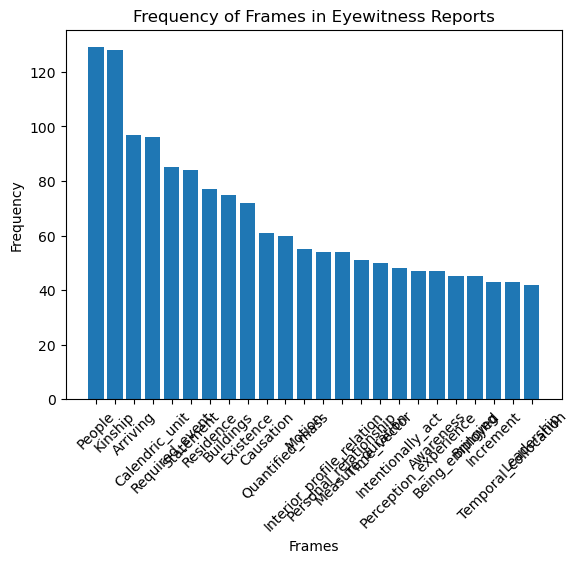

In [18]:
# Plot histogram
plt.bar(uniq_frames_list, frequencies)
plt.xlabel('Frames')
plt.ylabel('Frequency')
plt.title('Frequency of Frames in Eyewitness Reports')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Interesting notes:

Some frames are highly mentioned in both sources:
* Kinship

#### Locate Frames unique to one source or the other

* Exists in only one source and not the other
* Exists much more frequently in one source than the other

How:
- Get all frames 

In [55]:
from collections import Counter

def compare_lists(list1, list2):
    # Count occurrences of elements in each list
    count1 = Counter(list1)
    count2 = Counter(list2)
    
    # Calculate the total number of elements in each list
    total1 = sum(count1.values())
    total2 = sum(count2.values())
    
    # Calculate the frequency of each element in each list
    freq1 = {k: v / total1 for k, v in count1.items()}
    freq2 = {k: v / total2 for k, v in count2.items()}
    
    # Find elements in list 1 that occur much more frequently than in list 2
    significantly_more_frequent = {k: freq1[k] for k in freq1 if k in freq2 and freq1[k] >= 2 * freq2[k]}
    
    return significantly_more_frequent

In [20]:
# list1 = [1, 2, 3, 3, 3, 3, 3, 4, 4, 5]
# list2 = [1, 2, 3, 4]

# count1 = Counter(list1)
# count2 = Counter(list2)

# # Calculate the total number of elements in each list
# total1 = sum(count1.values())
# total2 = sum(count2.values())

# # Calculate the frequency of each element in each list
# freq1 = {k: v / total1 for k, v in count1.items()}
# freq2 = {k: v / total2 for k, v in count2.items()}

# # Find elements in list 1 that occur much more frequently than in list 2
# significantly_more_frequent = {k: freq1[k] for k in freq1 if k in freq2 and freq1[k] >= 2 * freq2[k]}
# significantly_more_frequent

**Gen lists of frames**

In [49]:
# Generate list of Frames
# Extract all frames from abstracts texts
def get_all_frames(col_of_frame_lists):
    abstracts_frames = []
    for abstract in col_of_frame_lists: # fix so that it's not just "abstract"
        list_of_frames = transform_str_to_list(abstract)
        for frame in list_of_frames:
            abstracts_frames.append(frame)  
    return abstracts_frames

In [60]:
eyewitness_frames_all = get_all_frames(eyewitness)
abstracts_frames_all = get_all_frames(abstracts)

In [61]:
eyewitness_over_abstracts = compare_lists(eyewitness_frames_all, abstracts_frames_all)
abstracts_over_eyewitness = compare_lists(abstracts_frames_all, eyewitness_frames_all)

In [63]:
print(len(eyewitness_over_abstracts))
eyewitness_over_abstracts

98


{'People_by_origin': 0.0017086715079026058,
 'Frequency': 0.007261853908586074,
 'Request': 0.007902605724049551,
 'Exchange': 0.00149508756941478,
 'Being_employed': 0.009611277231952157,
 'Desirability': 0.005339598462195643,
 'State_of_entity': 0.0006407518154634772,
 'Arriving': 0.020717642033319095,
 'Required_event': 0.018154634771465186,
 'Abandonment': 0.0021358393848782574,
 'Interior_profile_relation': 0.011533532678342588,
 'Possession': 0.007902605724049551,
 'Hearsay': 0.002776591200341734,
 'Make_noise': 0.0012815036309269544,
 'Size': 0.005553182400683468,
 'Buildings': 0.016018795386586928,
 'Cause_harm': 0.00598035027765912,
 'Dead_or_alive': 0.0012815036309269544,
 'Removing': 0.005553182400683468,
 'Calendric_unit': 0.02050405809483127,
 'Receiving': 0.0032037590773173856,
 'Event_instance': 0.0006407518154634772,
 'Placing': 0.0025630072618539087,
 'Residence': 0.01644596326356258,
 'Activity_prepare': 0.0006407518154634772,
 'Leadership': 0.00897052541648868,
 'Con

In [25]:
# Sort dict and output top N
def gen_top_frames(dictionary, N):
    # Sort the dictionary based on frequencies in descending order
    sorted_freq = dict(sorted(dictionary.items(), 
                              key=lambda item: item[1], reverse=True))

    # Extract the top N items
    # N = 15  # Number of top items to extract
    top_items = {k: sorted_freq[k] for k in list(sorted_freq)[:N]}

    return top_items

In [26]:
gen_top_frames(eyewitness_over_abstracts, 20)

{}

In [27]:
gen_top_frames(abstracts_over_eyewitness, 20)

{}

In [28]:
using_frame = fn.frame_by_name('Possession')
using_frame.definition

"An Owner has (or lacks) a Possession. '' 'The river's part of my  manor, but of course it also belongs to the River Police.'  'It's a nuisance having to abandon my belongings, though.'"

### Visualize Frames & Embeddings

Select all text that mentions Kinship
Make plot

In [29]:
frames['frames_list'] = ""

for index, cell_value in frames['frames'].items():
    frames.at[index, 'frames_list'] = transform_str_to_list(cell_value)

In [30]:
# frames.to_csv("eyewitness_abstracts_frame_list.csv")

In [31]:
target_str = 'Kinship'
def check_string_exists(cell_list):
    if target_str in cell_list:
        return 1
    else:
        return 0

In [32]:
# Apply the function to each cell in the column and store the result in a new column
frames['kinship'] = frames['frames_list'].apply(lambda x: check_string_exists(x))

In [33]:
frames['kinship'].value_counts()

kinship
0    547
1    153
Name: count, dtype: int64

In [34]:
# Select kinship == 1, expand embeddings, set source as index
kinship = frames[frames['kinship'] == 1]

In [35]:
# Set source as index
kinship.set_index('source', inplace=True)

In [36]:
# Expand embeddings
kinship = kinship[['embedding']]

In [37]:
kinship_expanded = pd.DataFrame(kinship['embedding'].apply(lambda x: transform_str_to_list(x)).to_list())

In [38]:
# Set index 
kinship_expanded = kinship_expanded.set_index(kinship.index)

In [39]:
kinship_expanded[:2]

,0,1,2,3,4,5,6,7,8,9,...,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535
source,,,,,,,,,,,,,,,,,,,,,
abstracts,0.012969,0.040151,-0.00929,0.008754,-0.038987,-0.014676,0.040416,0.038643,-0.008853,-0.000072,...,-0.030438,0.028373,-0.019586,-0.018593,-0.011421,-0.004043,0.014491,-0.020724,0.001151,-0.021558
abstracts,0.016527,0.020373,0.06330,0.044781,-0.016101,-0.005225,0.036612,-0.005823,0.002627,-0.019885,...,-0.044556,0.023957,-0.025561,-0.006459,0.006716,-0.028969,-0.009805,-0.004943,-0.013657,-0.028468


In [40]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib

In [41]:
tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=50)

# Fit and transform the embeddings using TSNE
embeddings_2d = tsne.fit_transform(kinship_expanded)

# Create a DataFrame for the 2D embeddings
embedding_2d_df = pd.DataFrame(embeddings_2d, columns=['x', 'y'], index=kinship_expanded.index)

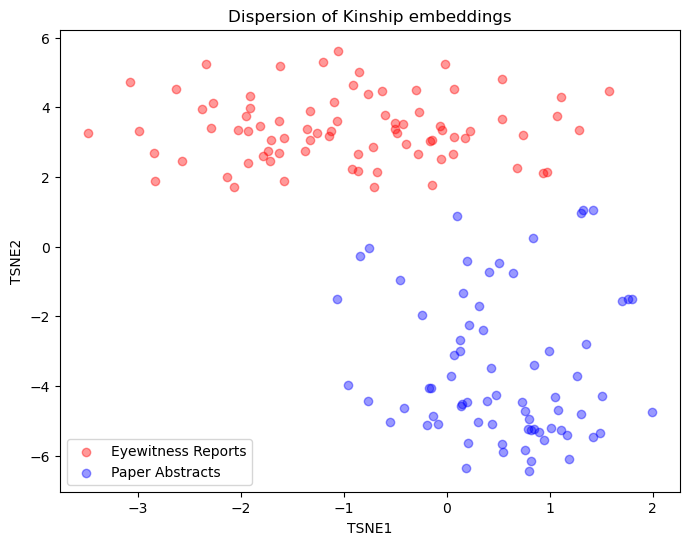

In [42]:
# Visualize the embeddings using TSNE

# Set colors
colordict = {
    'eyewitness': 'red',
    'abstracts': 'blue'
}
colors = [colordict[c] for c in kinship_expanded.index]

# Plot the 2D embeddings
plt.figure(figsize=(8, 6))
# plt.scatter(embedding_2d_df['x'], embedding_2d_df['y'], color=colors, alpha=0.4)
# plt.title('Contexualized Embeddings of Eyewitness Reports (Red) and Paper Abstracts (Blue)')
# plt.legend(['Eyewitness Reports', 'Paper Abstracts'])
# plt.xlabel('TSNE1')
# plt.ylabel('TSNE2')
# plt.show()


# Scatter plot for Eyewitness Reports
plt.scatter(embedding_2d_df['x'][kinship_expanded.index == 'eyewitness'], 
            embedding_2d_df['y'][kinship_expanded.index == 'eyewitness'], 
            color='red', alpha=0.4, label='Eyewitness Reports')

# Scatter plot for Paper Abstracts
plt.scatter(embedding_2d_df['x'][kinship_expanded.index == 'abstracts'], 
            embedding_2d_df['y'][kinship_expanded.index == 'abstracts'], 
            color='blue', alpha=0.4, label='Paper Abstracts')

plt.title('Dispersion of Kinship embeddings')
plt.legend()
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

I should project ALL of the points, then label the ones here so we can see the spread of Kinship vs. non.